In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import math
import os
cwd = os.getcwd()

In [124]:
sub = "\\1.041-1.200-CP1"
q1 = "\\q1"
q2 = "\\q2_v2"
idm_fvd_path = cwd+sub+q1+"\\flow-density-data"
idm_svd_path = cwd+sub+q1+"\\flow-speed-data"
cus_fvd_path = cwd+sub+q2+"\\flow-density-data"
cus_fvd_path = cwd+sub+q2+"\\flow-density-data"

In [125]:
def data(file):
    origin = np.array([[0, 0]])
    d = np.genfromtxt(file, delimiter=",", dtype=np.float64)
    return np.vstack([origin, d[d[:,0].argsort()]])

In [48]:
fvd = data(idm_fvd_path)
print(fvd)

[[ 0.          0.        ]
 [ 0.85421412  0.66666667]
 [ 1.63031253  0.86666667]
 [ 1.64304499  0.86666667]
 [ 3.00528409  0.93333333]
 [ 4.50908982  0.86666667]
 [ 6.27146024  0.8       ]
 [ 7.63779445  0.73333333]
 [ 8.39681262  0.6       ]
 [ 8.48204472  0.6       ]
 [ 9.50563887  0.53333333]
 [10.31540326  0.4       ]
 [11.31488249  0.46666667]
 [13.14836661  0.46666667]
 [13.57077176  0.46666667]
 [14.09036565  0.46666667]]


In [126]:
fvd = data(cus_fvd_path)
print(fvd)

[[ 0.          0.        ]
 [ 0.85421412  0.8       ]
 [ 1.60646159  1.2       ]
 [ 1.62413751  1.2       ]
 [ 2.910384    1.2       ]
 [ 4.47185892  1.26666667]
 [ 6.37447692  1.26666667]
 [ 7.24519822  1.2       ]
 [ 8.58739737  1.13333333]
 [ 8.68958799  1.13333333]
 [ 9.32040689  1.06666667]
 [ 9.93050254  1.06666667]
 [11.58381633  1.06666667]
 [13.20445347  1.        ]
 [13.65705096  1.06666667]
 [14.15385209  1.        ]]


In [132]:
ind_free = 5
k = fvd[:, 0]
q = fvd[:, 1]
k_f = fvd[0:ind_free,0]
A_f = np.vstack([k_f, np.zeros(len(k_f))]).T
q_f = fvd[0:ind_free,1]
k_c = fvd[ind_free-1:, 0]
A_c = np.vstack([k_c, np.ones(len(k_c))]).T
q_c = fvd[ind_free-1:, 1]
print(k_c)

[ 2.910384    4.47185892  6.37447692  7.24519822  8.58739737  8.68958799
  9.32040689  9.93050254 11.58381633 13.20445347 13.65705096 14.15385209]


In [137]:
m_f, c_f = np.linalg.lstsq(A_f, q_f, rcond=None)[0]
print(m_f, c_f)
m_c, c_c = np.linalg.lstsq(A_c, q_c, rcond=None)[0]
print(m_c, c_c)
k_o = c_c / (m_f - m_c)
q_max = m_f * int_x
k_j = c_c / -m_c
print(k_o, q_max, k_j)
x_f = np.arange(0, k_o, 0.1)
x_c = np.arange(k_o, 16, 0.1)
# print(x_f, x_c)

0.5584851732040181 0.0
-0.023166837737174765 1.3348339173587789
2.294901233469191 1.2695581630404413 57.61830477263766


Text(12, 0.3, '(57.6, 0)')

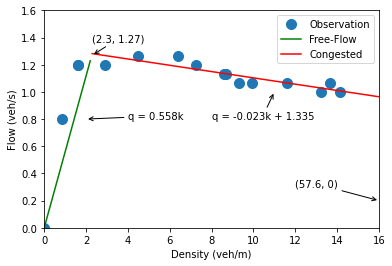

In [143]:
# m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# m, c
# import matplotlib.pyplot as plt
# _ = plt.plot(k_f, q_f, 'o', label='Original data', markersize=10)
# _ = plt.plot(k_f, m*k_f + c, 'r', label='Fitted line')
# _ = plt.legend()
# plt.show()
fig, ax = plt.subplots()

dots = ax.plot(k, q, 'o', label='Observation', markersize=10)

ax.plot(x_f, m_f*x_f + c_f, 'g', label='Free-Flow')
ax.plot(x_c, m_c*x_c + c_c, 'r', label='Congested')

# view control
ax.set_xlabel("Density (veh/m)")
ax.set_ylabel("Flow (veh/s)")
# x_end = math.ceil(k_j / 2.) * 2
x_end = 16
ax.set_xticks(np.append(x_end, np.arange(0, x_end, 2)))
ax.set_xlim([0, x_end])
ax.set_ylim([0, 1.6])

# plot decoration
leg = ax.legend(loc='upper right')
eq_f = f'q = {round(m_f, 3)}k'
eq_c = f'q = {round(m_c, 3)}k + {round(c_c, 3)}'

# Annotation
ax.annotate(text=eq_f,xy=(2, 0.8), xytext=(4, 0.8),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text=eq_c,xy=(11, 1), xytext=(8, 0.8),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text=(round(k_o, 1), round(q_max, 2)),xy=(k_o, q_max), xytext=(k_o, q_max + 0.1),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))
ax.annotate(text=(round(k_j, 1), 0),xy=(16, 0.2), xytext=(12, 0.3),
            arrowprops=dict(facecolor='black', arrowstyle = '->'))